# Overview

This notebook is a quick primer on some of the file types you will encounter when working with medical images. It's designed to just get you comfortable taking the different file formats and whipping them into a shape you may actually be familar with.

---

# Imports

Until we have a standardized docker container, you will need to install the following libraries. Conda environments are probably the best, although pyenv, and calling pip directly are also viable methods.

---

In [1]:
import h5py
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# this will make matplotlib plots larger
# you may want to adjust this depending on your display
plt.rcParams['figure.dpi'] = 240

# How To Load A ".nii.gz" File : Anatomical MRI Scans

One of the modalities that radiologist capture is high-resolution "anatomical" scan of a subject. We start with these to demonstrate loading the filetypes as they give a recognizable result when visualized!

---

## Loading the image

In [2]:
# lets grab an image from the dataset (note: i've renamed this file)
dir = "example_data/sub-01_anatomy.nii.gz"

# nib_img is an instance of an nibabel image
nib_img = nib.load(dir)

# nib_img.dataobj is the object pointing to the img array data
img_data = nib_img.dataobj

## Visualizing the scan

An important thing to remind yourself is that these particular brain scans are ***volumetric***.
As a result we will have ***voxels*** instead of ***pixels*** which you might be used to. 
> *think "stacks of pictures"*

One last thing that may be worthwile knowing is that patients are scanned from the "feet up" (as opposed to from the "head down") , this may further help build the mental model as you work with the data.

In [3]:
img_data.shape

(256, 256, 208)

Now that we're a little more familiar with the structure of this data, we can actually peak into the data!

note: we rotate the sagittal view because indexing this way will result in a rotated image

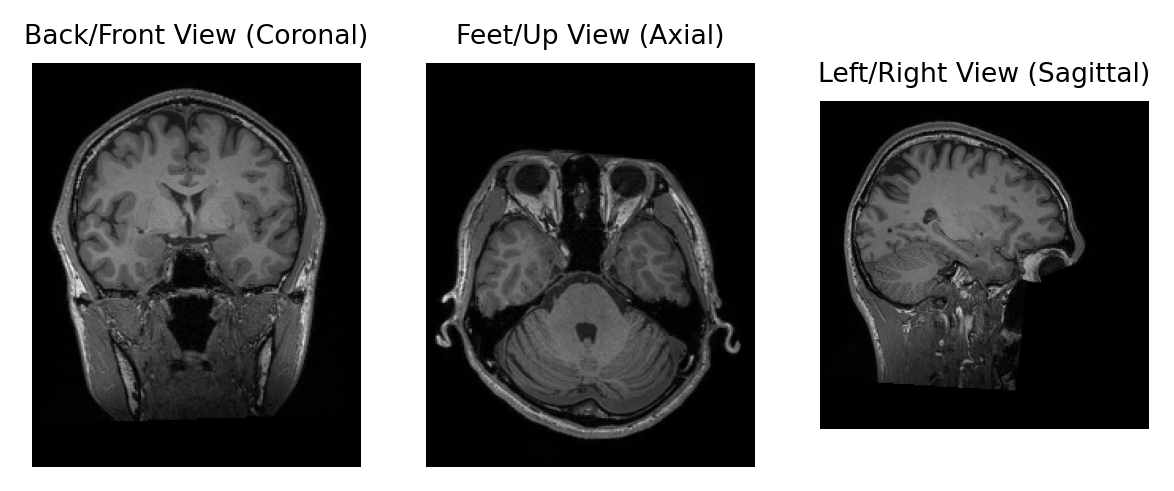

In [4]:
# we can take a few slices from the image to visualize what we have so far

# index into some positions at different axis to view the scan from different angles
back = img_data[128, ...]
top = img_data[:,128,:]
side = np.rot90(img_data[...,128], k=3)

# make plt canvas to draw on
fig, ax = plt.subplots(1,3)

# visualize images
ax[0].imshow(back, cmap=plt.cm.gray)
ax[1].imshow(top, cmap=plt.cm.gray)
ax[2].imshow(side, cmap=plt.cm.gray)

# disable x/y axis 
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

# disable x/y axis 
ax[0].set_title(f'Back/Front View (Coronal)', size=8)
ax[1].set_title(f'Feet/Up View (Axial)',  size=8)
ax[2].set_title(f'Left/Right View (Sagittal)',  size=8)

fig.show()

# Binary Masks and Another ".nii.gz" Lesson

Let's load up a binary mask from the fMRI reconstruction paper. 

The authors of the fMRI paper used regression analysis to determine which voxels from various parts of the fMRI had the highest correlation with the target variables during training. These are reffered to in the paper as "ROI" or Regions Of Interest, and are defined as a binary mask. 

---

In [5]:
# let's load the mask like we learned
mask = nib.load("example_data/sub-01_ROI.nii.gz")

# print the array
print(f"Mask Data: {mask.dataobj}")

Mask Data: <nibabel.arrayproxy.ArrayProxy object at 0x7f466c6f6160>


Wait! What? Did you see what happened? Instead of a numpy array like we expected we got something called an ```ArrayProxy```. 

> An array proxy is just a pointer to data stored on disk. 

This is something that you may run into, and fortunately nibabel gives us a really easy way to extract the data. Using the ```get_fdata()``` function, we can automatically cast the values to floats in a numpy array.

Another helpful function to know is ```nib.is_proxy()``` which can programatically check if a ```nib.dataobj``` is a proxy.

In [6]:
# lets try again!
if nib.is_proxy(mask.dataobj):
    print(f"We were originally given a proxy, using get_fdata() to convert it...")
    mask = mask.get_fdata()
    
print(f"\nMask Shape: {mask.shape} | Mask Type: {type(mask)}")

We were originally given a proxy, using get_fdata() to convert it...

Mask Shape: (96, 96, 76) | Mask Type: <class 'numpy.ndarray'>


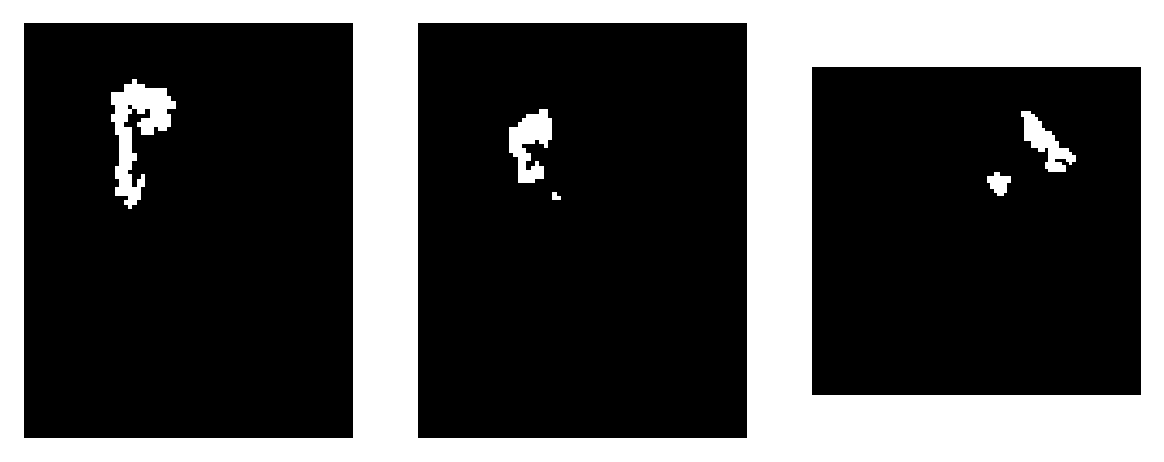

In [7]:
# Finally, we can quickly visualize this similar to how we did it before...

back = mask[30, ...]
top = mask[:,30,:]
side = np.rot90(mask[...,30], k=3)

# make plt canvas to draw on
fig, ax = plt.subplots(1,3)

# visualize images
ax[0].imshow(back, cmap=plt.cm.gray)
ax[1].imshow(top, cmap=plt.cm.gray)
ax[2].imshow(side, cmap=plt.cm.gray)

# disable x/y axis 
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

fig.show()

# Loading ".h5" Files : The Visual Cortex
---
After the fMRI authors located the most helpful voxels, they flattened them into a more managable format. This flattened data is referred to as the Visual Cortex "VC" in the paper, and is ultimately what they use (as far as I can tell) to learn the reconstruction.

Here they store them as ".h5" files and we can load them using the accompanying python library.

In [8]:
visual_cortex = h5py.File("example_data/sub-01_VC.h5", 'r')

h5 files act like dictionaries and have keys associated with them (kind of like the nib images). we can discover what's inside by writing code like the following.

In [9]:
for key in visual_cortex.keys():
    print(key) #Names of the groups in HDF5 file.

dataset
metadata


In [10]:
visual_cortex = visual_cortex['dataset']
print(f"Shape of Visual Cortex Data: {visual_cortex.shape}")

Shape of Visual Cortex Data: (6000, 11730)
